# Historical emissions across subnets

On this notebook, you can find code to get information on the share of emissions subnets receive. 

In [13]:
import bittensor as bt
import torch
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from substrateinterface import SubstrateInterface

In [14]:
subtensor = bt.subtensor('archive')
substrate = SubstrateInterface(url="wss://archive.chain.opentensor.ai:443/")

## Weekly data for all subnets
*Update: I changed the code to get the daily data over the past week* <br>
Parameters to change: 
- first param of the blocks range
- relativedelta param for start_date

In [15]:
block = substrate.get_block()['header']['number']
print(block)
# get latest block
# essai sur 4 mois, avec 6000 blocks/j, 1semaine = 42000 blocks
blocks_per_week = 7200*7
blocks = range(block - blocks_per_week*4, block, 7200)
#jour block 2735000: 10 avril
# find block timestamp
today = datetime.today().date()
start_date = (today - relativedelta(weeks=4))
days_since_start = 0
print(block, blocks)

3069596
3069596 range(2867996, 3069596, 7200)


In [16]:
emissions_data_top10 = {}
emissions_data_bottom10 = {}
emissions_data_middle = {}

# to change every time I run it
top10_subnets = [0, 19, 18, 9, 8, 1, 5, 21, 2, 22]
bottom10_subnets = [6, 16, 34, 25, 33, 14, 4, 29, 11, 26]
middle_subnets= [value for value in range(0, 35) if value not in set(top10_subnets + bottom10_subnets)]

for block in blocks:
    top10_subnets_emissions = {}
    bottom10_subnets_emissions = {}
    middle_subnets_emissions = {}

    date = (start_date + relativedelta(days=days_since_start)).strftime('%Y-%m-%d')
    days_since_start += 1
    print(block, date)

    for i in top10_subnets:
        top10_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_top10[date] = top10_subnets_emissions

    
    for i in bottom10_subnets:
        bottom10_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_bottom10[date] = bottom10_subnets_emissions

    
    for i in middle_subnets:
        middle_subnets_emissions[i]= float(subtensor.get_emission_value_by_subnet(i, block))
    emissions_data_middle[date] = middle_subnets_emissions

emissions_data_top10 = pd.DataFrame(emissions_data_top10).T
emissions_data_bottom10 = pd.DataFrame(emissions_data_bottom10).T
emissions_data_middle = pd.DataFrame(emissions_data_middle).T

2867996 2024-05-02
2875196 2024-05-03
2882396 2024-05-04
2889596 2024-05-05
2896796 2024-05-06
2903996 2024-05-07
2911196 2024-05-08
2918396 2024-05-09
2925596 2024-05-10
2932796 2024-05-11
2939996 2024-05-12
2947196 2024-05-13
2954396 2024-05-14
2961596 2024-05-15
2968796 2024-05-16
2975996 2024-05-17
2983196 2024-05-18
2990396 2024-05-19
2997596 2024-05-20
3004796 2024-05-21
3011996 2024-05-22
3019196 2024-05-23
3026396 2024-05-24
3033596 2024-05-25
3040796 2024-05-26
3047996 2024-05-27
3055196 2024-05-28
3062396 2024-05-29


In [28]:
print(emissions_data_top10.iloc[-1].sum())
print(emissions_data_middle.iloc[-1].sum())
print(emissions_data_bottom10.iloc[-1].sum())

0.6321026319999999
0.323645346
0.04422902099999999


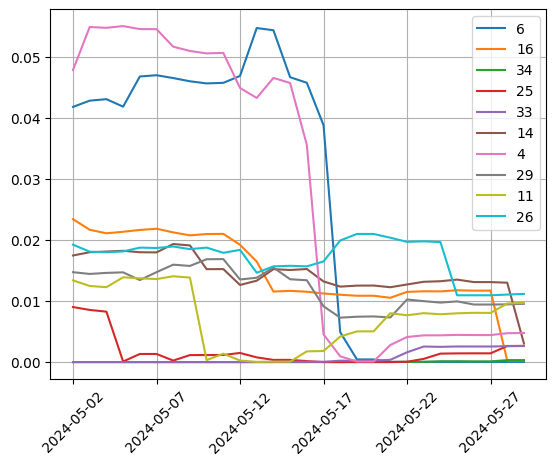

In [29]:
emissions_data_bottom10.plot(kind='line')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Daily emissions data for one subnet

In [127]:
block = substrate.get_block()['header']['number']
print(block)

# blocks
blocks_per_day = 7200
period = 50
blocks = range(block - blocks_per_day*period, block + blocks_per_day, blocks_per_day)

# today date
today = datetime.today().date()
start_date = (today - relativedelta(days=period))
days_since_start = 0
print(blocks)

3055179
range(2695179, 3062379, 7200)


In [128]:
emissions_data = {}

for block in blocks:
    subnet_emissions_1 = {}

    date = (start_date + relativedelta(days=days_since_start)).strftime('%m-%d')
    days_since_start += 1
    print(block, date)

    emissions = float(subtensor.get_emission_value_by_subnet(2, block))
    emissions_data[date] = emissions

index = pd.date_range(start=start_date, periods=days_since_start, freq='D')
emissions_df = pd.DataFrame(emissions_data, index=index).T

2695179 2024-04-08
2702379 2024-04-09
2709579 2024-04-10
2716779 2024-04-11
2723979 2024-04-12
2731179 2024-04-13
2738379 2024-04-14
2745579 2024-04-15
2752779 2024-04-16
2759979 2024-04-17
2767179 2024-04-18
2774379 2024-04-19
2781579 2024-04-20
2788779 2024-04-21
2795979 2024-04-22
2803179 2024-04-23
2810379 2024-04-24
2817579 2024-04-25
2824779 2024-04-26
2831979 2024-04-27
2839179 2024-04-28
2846379 2024-04-29
2853579 2024-04-30
2860779 2024-05-01
2867979 2024-05-02
2875179 2024-05-03
2882379 2024-05-04
2889579 2024-05-05
2896779 2024-05-06
2903979 2024-05-07
2911179 2024-05-08
2918379 2024-05-09
2925579 2024-05-10
2932779 2024-05-11
2939979 2024-05-12
2947179 2024-05-13
2954379 2024-05-14
2961579 2024-05-15
2968779 2024-05-16
2975979 2024-05-17
2983179 2024-05-18
2990379 2024-05-19
2997579 2024-05-20
3004779 2024-05-21
3011979 2024-05-22
3019179 2024-05-23
3026379 2024-05-24
3033579 2024-05-25
3040779 2024-05-26
3047979 2024-05-27
3055179 2024-05-28


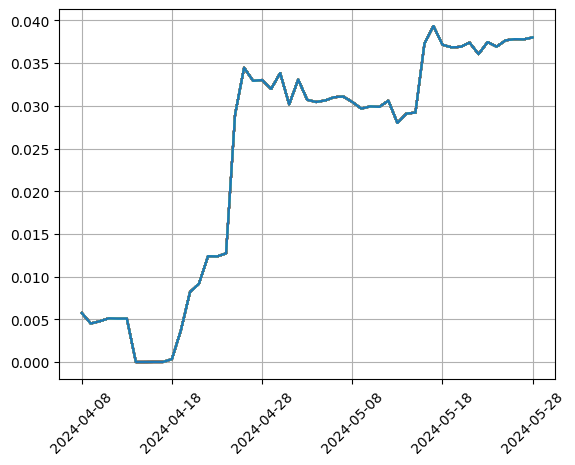

In [139]:
emissions_df.plot(kind='line')
plt.xticks(rotation=45)
plt.grid()
plt.legend().remove()
plt.show()